# <center> R2.08 - Statistique descriptive <br> TP 1 bis - Description unidimensionnelle </center>

<center> A. Ridard </center>

L'objectif est de reprendre le TP1, mais avec Python cette fois !

**Deux documents pouvant être utiles :**
-  [<font style="color:blue">Une (très) courte introduction à Python</font>](http://math-ridard.fr/wp-content/contenu_wp/ens_iut/Intro_Python.pdf)
- [<font style="color:blue">Un aide-mémoire complet</font>](http://math-ridard.fr/wp-content/contenu_wp/ens_iut/Memento_Pointal.pdf)

**La référence présentée en cours :** 
-  [<font style="color:blue">Le GitHub du livre "Python pour le data scientist"</font>](https://github.com/emjako/pythondatascientist)

## Importations pour ce TP

In [2]:
# importation des packages
import numpy as np
import pandas as pd
import seaborn as sns

# importation des modules
import matplotlib.pyplot as plt
import scipy.stats as sps

> Charger les données du fichier **TP1_Data.xslx** dans un DataFrame.

In [6]:
# importation du fichier Excel
df = pd.read_excel("TP1_Data.xlsx")
df.head()

id_etudiant specialite_ensibs  dpt_entreprise  dpt_lycee    bac   
0            9          CyberDef            56.0         35  Bac S  \
1           10          CyberDef            22.0         22  Bac S   
2           14          CyberDef            35.0         60  Bac S   
3           19          CyberDef            46.0          7  Bac S   
4           25          CyberLog             NaN         90  Bac S   

  mention_bac           note_maths_bac                postbac  dpt_postbac   
0  Assez bien  Entre 10 et 12 (exclus)                DUT R&T           35  \
1  Assez bien  Entre 10 et 12 (exclus)               DUT INFO           22   
2        Bien  Entre 10 et 12 (exclus)               DUT INFO           56   
3    Passable  Entre 10 et 12 (exclus)                DUT R&T           74   
4        Bien  Entre 10 et 12 (exclus)  Prépa concours (CPGE)           67   

   gpa_maths_crypto  gpa_protocoles_crypto  
0               3.5                   3.45  
1               3.0                   3.50  
2               0.0                   3.40  
3               2.0                   3.00  
4               4.0                   3.85

## Représentations graphiques

*Pour établir les différentes distributions, on pourra utiliser la méthode **.groupby()** (cf. section 4.5 du livre) équivalente au regroupement en SQL.*

**Représenter graphiquement**, avec le diagramme le plus adapté (cf. section 5 du livre), la **distribution** :

> des trois spécialités

In [7]:
# Tableau
spe_ensibs = df.groupby("specialite_ensibs")[["id_etudiant"]].count()
spe_ensibs = spe_ensibs.rename(columns={"id_etudiant": "effectif"})
spe_ensibs

effectif
specialite_ensibs          
CyberData                15
CyberDef                 52
CyberLog                 26

<Axes: xlabel='specialite_ensibs'>

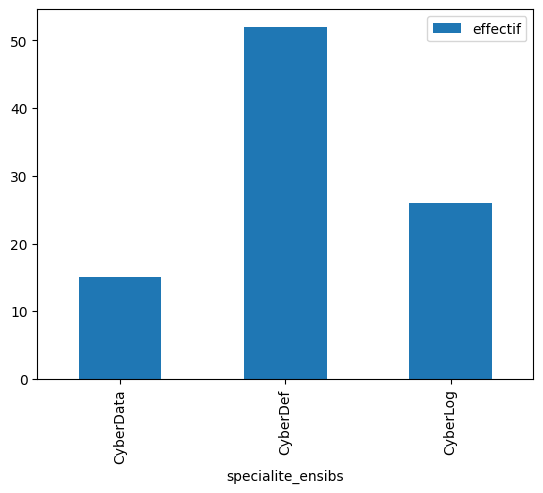

In [8]:
# Graphique
spe_ensibs.plot.bar()

> des bacs **toute spécialité confondue**

In [10]:
# Tableau
bacs = df.groupby("bac")[["id_etudiant"]].count()
bacs = bacs.rename(columns={"id_etudiant": "effectif"})
bacs

effectif
bac                
Bac ES            2
Bac Pro           3
Bac S            80
Bac STHR          1
Bac STI2D         7

<Axes: ylabel='effectif'>

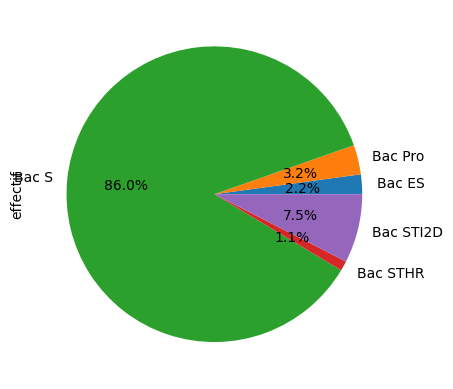

In [13]:
# Graphique
bacs["effectif"].plot(kind="pie", autopct="%1.1f%%")

> des bacs pour chacune des spécialités

In [14]:
# Tableau
bacs = df.groupby(["specialite_ensibs", "bac"])[["id_etudiant"]].count()
bacs = bacs.rename(columns={"id_etudiant": "effectif"})
bacs

effectif
specialite_ensibs bac                
CyberData         Bac ES            1
                  Bac S            14
CyberDef          Bac Pro           3
                  Bac S            42
                  Bac STHR          1
                  Bac STI2D         6
CyberLog          Bac ES            1
                  Bac S            24
                  Bac STI2D         1

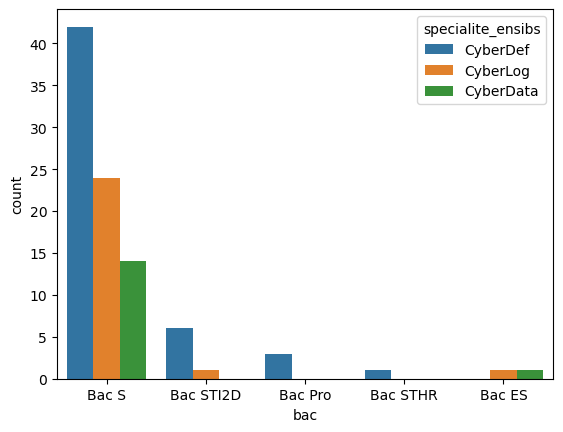

In [93]:
# Graphique
sns.countplot(x='bac', hue='specialite_ensibs', data=df)
#plt.legend()
plt.show()

> des mentions **au bac S**

In [17]:
# Tableau
bac_s = df[df["bac"] == "Bac S"].groupby("mention_bac")
bac_s["id_etudiant"].count()

mention_bac
Assez bien    37
Bien          27
Passable       8
Très bien      8
Name: id_etudiant, dtype: int64

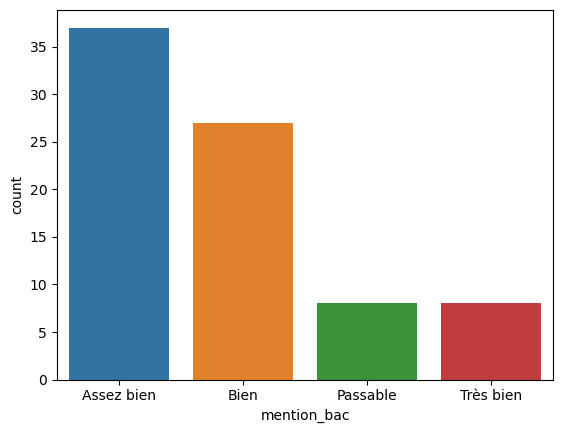

In [100]:
# Graphique
sns.countplot(x='mention_bac', data=df[df["bac"] == "Bac S"])
#plt.legend()
plt.show()

> des mentions **au bac S** pour chacune des spécialités

In [102]:
# Tableau
bac_s = df[df["bac"] == "Bac S"].groupby(["mention_bac", "specialite_ensibs"])
bac_s["id_etudiant"].count()

mention_bac  specialite_ensibs
Assez bien   CyberData             8
             CyberDef             16
             CyberLog             13
Bien         CyberData             4
             CyberDef             16
             CyberLog              7
Passable     CyberData             1
             CyberDef              5
             CyberLog              2
Très bien    CyberData             1
             CyberDef              5
             CyberLog              2
Name: id_etudiant, dtype: int64

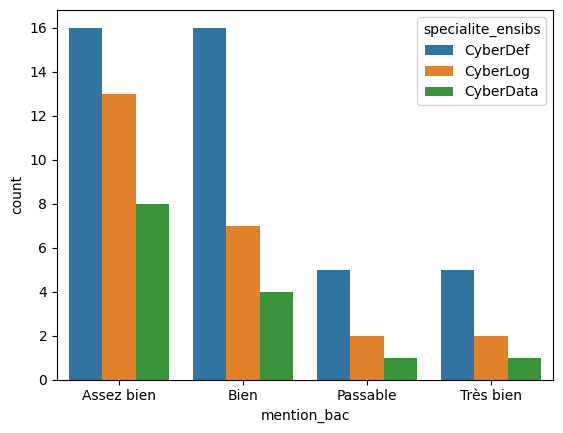

In [19]:
sns.countplot(x='mention_bac', hue="specialite_ensibs" ,data=df[df["bac"] == "Bac S"])
#plt.legend()
plt.show()

> des formations postbac

In [21]:
# Tableau
post_bac = df.groupby("postbac")[["id_etudiant"]].count()
post_bac = post_bac.rename(columns={"id_etudiant": "effectif"})
post_bac

effectif
postbac                        
Autre                        11
DUT INFO                     36
DUT R&T                      23
Prépa concours (CPGE)        14
Prépa intégrée (PEI)          9

<Axes: ylabel='effectif'>

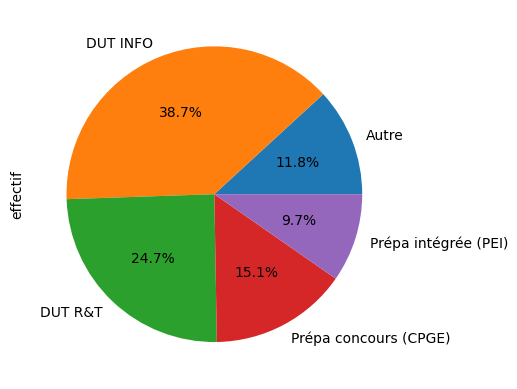

In [22]:
# Graphique
#plt.pie(post_bac['id_etudiant'], labels=post_bac.index ,autopct='%1.1f%%')
post_bac["effectif"].plot(kind="pie", autopct="%1.1f%%")

> des formations postbac pour chacune des spécialités

In [46]:
# Tableau
postbac_spe = df.groupby(["specialite_ensibs", "postbac"])[["id_etudiant"]].count().unstack()
postbac_spe

id_etudiant                                          
postbac                 Autre DUT INFO DUT R&T Prépa concours (CPGE)   
specialite_ensibs                                                      
CyberData                 4.0      7.0     2.0                   NaN  \
CyberDef                  4.0     23.0    20.0                   1.0   
CyberLog                  3.0      6.0     1.0                  13.0   

                                        
postbac           Prépa intégrée (PEI)  
specialite_ensibs                       
CyberData                          2.0  
CyberDef                           4.0  
CyberLog                           3.0

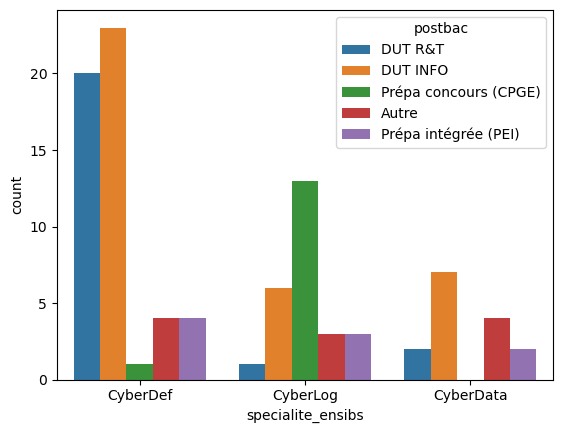

In [11]:
# Graphique
sns.countplot(hue='postbac', x='specialite_ensibs', data=df)
plt.show()

> des formations postbac pour chacune des mentions **au bac S**

In [45]:
# Tableau
bacs = df[df["bac"] == "Bac S"].groupby(["mention_bac", "postbac"])[["id_etudiant"]].count().unstack()
bacs

id_etudiant                                          
postbac           Autre DUT INFO DUT R&T Prépa concours (CPGE)   
mention_bac                                                      
Assez bien          6.0     12.0    11.0                   5.0  \
Bien                NaN     14.0     2.0                   6.0   
Passable            2.0      3.0     3.0                   NaN   
Très bien           1.0      3.0     1.0                   2.0   

                                  
postbac     Prépa intégrée (PEI)  
mention_bac                       
Assez bien                   3.0  
Bien                         5.0  
Passable                     NaN  
Très bien                    1.0

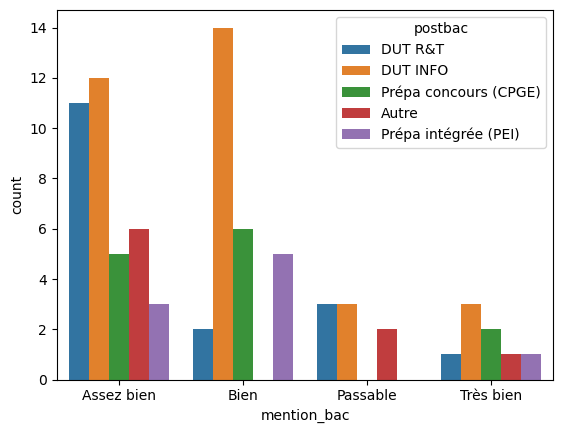

In [13]:
# Graphique
sns.countplot(x='mention_bac', hue="postbac" ,data=df[df["bac"] == "Bac S"])
plt.show()

> des départements du lycée

In [26]:
# Tableau
dpt_lycee = df.groupby("dpt_lycee")[["id_etudiant"]].count()
dpt_lycee = dpt_lycee.rename(columns={"id_etudiant": "effectif"})
dpt_lycee

effectif
dpt_lycee          
6                 1
7                 1
14                3
22                7
26                2
28                1
29                5
30                1
32                1
33                2
35               10
37                1
41                3
44                4
45                1
51                1
54                1
56               12
57                2
59                2
60                2
63                2
67                2
69                3
73                1
75                3
76                3
78                1
79                1
83                1
85                1
86                1
88                2
89                1
90                1
91                1
92                1
93                1
95                1
98                1
99                1
974               1

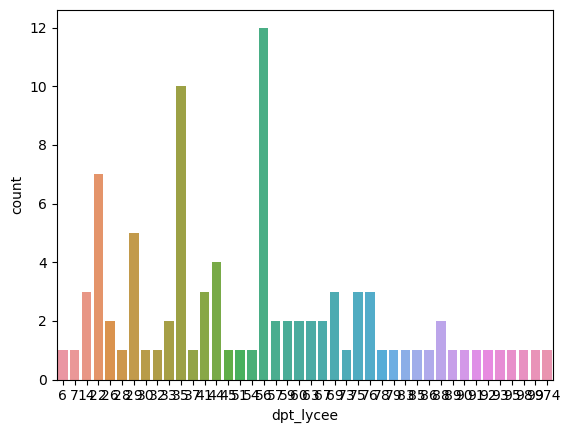

In [16]:
# Graphique
sns.countplot(x='dpt_lycee', data=df)
plt.show()

> des étudiants qui n'ont pas changé de département pour leur formation postbac

In [30]:
# Tableau
df["memeDpt"] = df["dpt_lycee"] == df["dpt_postbac"]

meme_dpt = df.groupby("memeDpt")[["id_etudiant"]].count()
meme_dpt = meme_dpt.rename(columns={"id_etudiant": "effectif"})
meme_dpt


effectif
memeDpt          
False          43
True           50

<Axes: ylabel='effectif'>

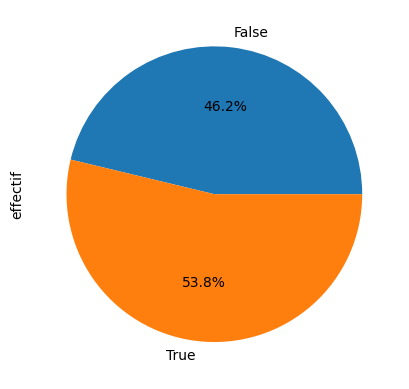

In [31]:
# Graphique
meme_dpt["effectif"].plot(kind="pie", autopct="%1.1f%%")

> des notes de maths au bac

In [41]:
# Tableau
note_maths_bac = df.groupby(["note_maths_bac"])[["id_etudiant"]].count()
note_maths_bac = note_maths_bac.rename(columns={"id_etudiant": "effectif"})
note_maths_bac

effectif
note_maths_bac                   
Entre 10 et 12 (exclus)        14
Entre 12 et 14 (exclus)        20
Entre 14 et 16 (exclus)        27
Entre 16 et 18 (exclus)        16
Entre 18 et 20                 10
Entre 4 et 8 (exclus)           2
Entre 8 et 10 (exclus)          4

<Axes: xlabel='note_maths_bac'>

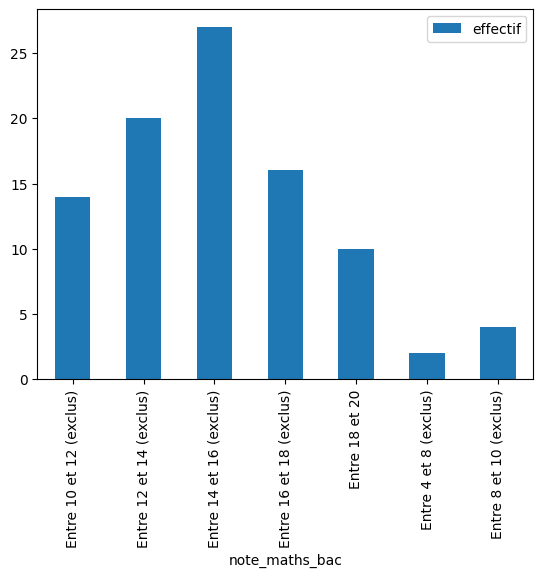

In [42]:
# Graphique
note_maths_bac.plot.bar()

> des notes de maths au bac pour chacune des spécialités

In [44]:
# Tableau
note_maths_bac_spe = df.groupby(["note_maths_bac", "specialite_ensibs"])[["id_etudiant"]].count().unstack()
#note_maths_bac_spe = note_maths_bac_spe.rename(columns={"id_etudiant": "effectif"})
note_maths_bac_spe

id_etudiant                  
specialite_ensibs         CyberData CyberDef CyberLog
note_maths_bac                                       
Entre 10 et 12 (exclus)         2.0      7.0      5.0
Entre 12 et 14 (exclus)         2.0     10.0      8.0
Entre 14 et 16 (exclus)         4.0     18.0      5.0
Entre 16 et 18 (exclus)         3.0      9.0      4.0
Entre 18 et 20                  3.0      4.0      3.0
Entre 4 et 8 (exclus)           NaN      1.0      1.0
Entre 8 et 10 (exclus)          1.0      3.0      NaN

<Axes: xlabel='note_maths_bac', ylabel='count'>

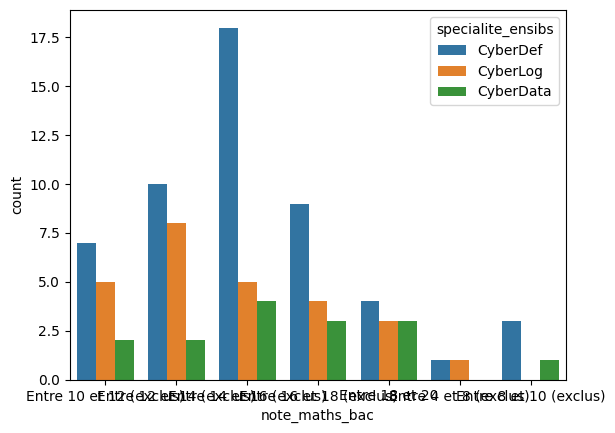

In [47]:
# Graphique
sns.countplot(x='note_maths_bac', hue="specialite_ensibs" ,data=df)

> des notes de protocoles en cryptographie

In [48]:
# Tableau
note_crypto = df.groupby(["gpa_protocoles_crypto"])[["id_etudiant"]].count()
note_crypto = note_crypto.rename(columns={"id_etudiant": "effectif"})
note_crypto

effectif
gpa_protocoles_crypto          
0.00                          1
2.00                          2
2.30                          1
2.50                          1
3.00                         26
3.05                          1
3.10                          2
3.15                          2
3.20                          5
3.25                          5
3.30                          1
3.33                          1
3.35                          2
3.40                          5
3.43                          2
3.45                         10
3.48                          1
3.50                          9
3.60                          2
3.65                          3
3.70                          2
3.73                          1
3.80                          3
3.85                          1
4.00                          3

/tmp/ipykernel_12440/3640457882.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(note_crypto_sans_nan, kde=False)


<Axes: >

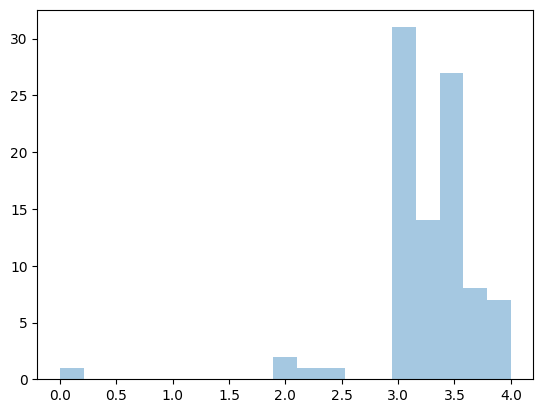

In [54]:
# Graphique
note_crypto_sans_nan = df[["gpa_protocoles_crypto"]].dropna()

sns.distplot(note_crypto_sans_nan, kde=False)

> des notes de protocoles en cryptographie pour chacune des spécialités

In [64]:
# Tableau
note_crypto_spe = df.groupby(["gpa_protocoles_crypto", "specialite_ensibs"])[["id_etudiant"]].count()
note_crypto_spe = note_crypto_spe.rename(columns={"id_etudiant": "effectif"})
note_crypto_spe

effectif
gpa_protocoles_crypto specialite_ensibs          
0.00                  CyberData                 1
2.00                  CyberDef                  1
                      CyberLog                  1
2.30                  CyberDef                  1
2.50                  CyberDef                  1
3.00                  CyberData                10
                      CyberDef                 10
                      CyberLog                  6
3.05                  CyberLog                  1
3.10                  CyberDef                  2
3.15                  CyberData                 1
                      CyberLog                  1
3.20                  CyberData                 2
                      CyberDef                  3
3.25                  CyberDef                  5
3.30                  CyberLog                  1
3.33                  CyberDef                  1
3.35                  CyberDef                  2
3.40                  CyberDef                  4
                      CyberLog                  1
3.43                  CyberLog                  2
3.45                  CyberDef                 10
3.48                  CyberLog                  1
3.50                  CyberData                 1
                      CyberDef                  6
                      CyberLog                  2
3.60                  CyberDef                  2
3.65                  CyberDef                  1
                      CyberLog                  2
3.70                  CyberLog                  2
3.73                  CyberLog                  1
3.80                  CyberLog                  3
3.85                  CyberLog                  1
4.00                  CyberDef                  3

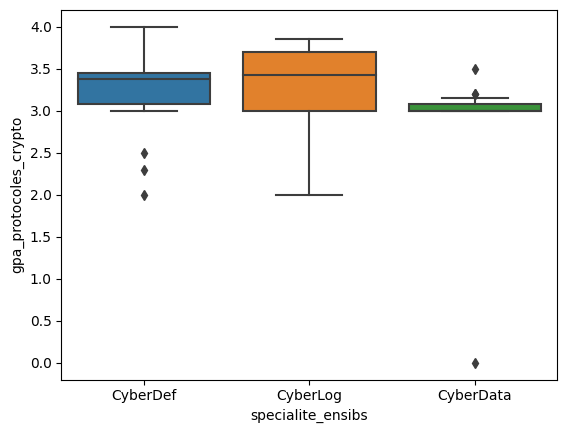

In [66]:
# Graphique
sns.boxplot(x="specialite_ensibs", y="gpa_protocoles_crypto", data=df)
plt.show()


> des notes de protocoles en cryptographie pour chacune des formations postbac

In [67]:
# Tableau
note_crypto_postbac = df.groupby(["gpa_protocoles_crypto", "postbac"])[["id_etudiant"]].count()
note_crypto_postbac = note_crypto_postbac.rename(columns={"id_etudiant": "effectif"})
note_crypto_postbac

effectif
gpa_protocoles_crypto postbac                        
0.00                  DUT INFO                      1
2.00                  DUT INFO                      1
                      Prépa concours (CPGE)         1
2.30                  DUT R&T                       1
2.50                  DUT INFO                      1
3.00                  Autre                         6
                      DUT INFO                     10
                      DUT R&T                       6
                      Prépa concours (CPGE)         1
                      Prépa intégrée (PEI)          3
3.05                  Prépa concours (CPGE)         1
3.10                  DUT R&T                       1
                      Prépa intégrée (PEI)          1
3.15                  Prépa concours (CPGE)         1
                      Prépa intégrée (PEI)          1
3.20                  DUT INFO                      2
                      DUT R&T                       2
                      Prépa concours (CPGE)         1
3.25                  DUT INFO                      3
                      Prépa intégrée (PEI)          2
3.30                  DUT INFO                      1
3.33                  Autre                         1
3.35                  DUT INFO                      1
                      DUT R&T                       1
3.40                  DUT INFO                      3
                      DUT R&T                       1
                      Prépa concours (CPGE)         1
3.43                  Autre                         1
                      Prépa concours (CPGE)         1
3.45                  Autre                         1
                      DUT INFO                      5
                      DUT R&T                       4
3.48                  Prépa concours (CPGE)         1
3.50                  Autre                         1
                      DUT INFO                      3
                      DUT R&T                       4
                      Prépa intégrée (PEI)          1
3.60                  Autre                         1
                      DUT INFO                      1
3.65                  DUT R&T                       1
                      Prépa concours (CPGE)         1
                      Prépa intégrée (PEI)          1
3.70                  DUT INFO                      1
                      Prépa concours (CPGE)         1
3.73                  Prépa concours (CPGE)         1
3.80                  DUT INFO                      1
                      Prépa concours (CPGE)         2
3.85                  Prépa concours (CPGE)         1
4.00                  DUT INFO                      1
                      DUT R&T                       2

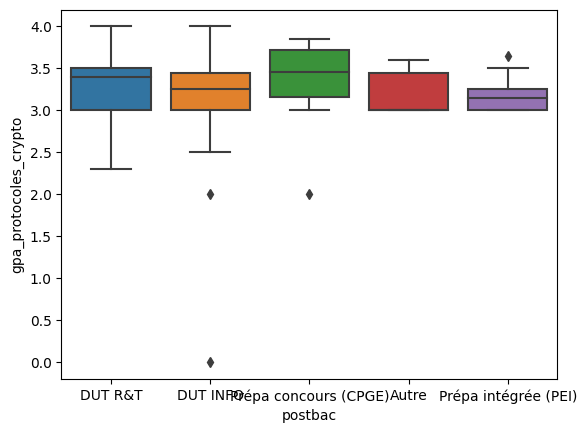

In [68]:
# Graphique
sns.boxplot(x="postbac", y="gpa_protocoles_crypto", data=df)
plt.show()

## Indicateurs statistiques

*Là encore, on pourra utiliser la méthode **.groupby()** (cf. section 4.5 du livre) accompagnée de **.agg()**.*

**Calculer** :

> le nombre d'étudiants pour chacune des spécialités

In [69]:
# Réponse
# Claculer le nombre d'étudiants pour chacune des spécialités
spe_ensibs = df.groupby("specialite_ensibs")[["id_etudiant"]].agg(["count"])
spe_ensibs

id_etudiant
                        count
specialite_ensibs            
CyberData                  15
CyberDef                   52
CyberLog                   26

> la moyenne et l'écart-type des notes de protocoles en cryptographie

In [70]:
# Réponse
# Calculer la moyenne et l'écart-type des notes de protocoles en cryptographie
avg_std_notes = df[["gpa_protocoles_crypto"]].agg(["mean", "std"])
avg_std_notes

gpa_protocoles_crypto
mean               3.236957
std                0.496320

> la moyenne et l'écart-type des notes de protocoles en cryptographie pour chacune des spécialités

In [71]:
# Réponse
avg_std_notes_spe = df.groupby("specialite_ensibs")[["gpa_protocoles_crypto"]].agg(["mean", "std"])
avg_std_notes_spe

gpa_protocoles_crypto          
                                   mean       std
specialite_ensibs                                
CyberData                      2.870000  0.806181
CyberDef                       3.285192  0.360405
CyberLog                       3.356800  0.417978

> la moyenne et l'écart-type des notes de protocoles en cryptographie pour chacune des formations postbac

In [72]:
# Réponse
avg_std_notes_postbac = df.groupby("postbac")[["gpa_protocoles_crypto"]].agg(["mean", "std"])
avg_std_notes_postbac

gpa_protocoles_crypto          
                                       mean       std
postbac                                              
Autre                              3.210000  0.249239
DUT INFO                           3.152857  0.656298
DUT R&T                            3.304348  0.367087
Prépa concours (CPGE)              3.374286  0.490443
Prépa intégrée (PEI)               3.211111  0.231541

> la moyenne des extrêmes et l'étendue des notes de maths pour la crypto

In [78]:
# Réponse
def avg_extremes(x):
	return (np.min(x) + np.max(x)) / 2

def span(x):
	return np.max(x) - np.min(x)

avg_extremes_span_crypto = df.groupby(["id_etudiant"].count)[["gpa_maths_crypto"]].agg([avg_extremes, span])
avg_extremes_span_crypto

gpa_maths_crypto     
      avg_extremes span
0              2.0  4.0

> la moyenne des extrêmes et l'étendue des notes de maths pour la crypto pour chacune des spécialités

In [141]:
# Réponse
avg_extremes_span_crypto_spe = df.groupby("specialite_ensibs")[["gpa_maths_crypto"]].agg([avg_extremes, span])
avg_extremes_span_crypto_spe

gpa_maths_crypto     
                      avg_extremes span
specialite_ensibs                      
CyberData                      2.0  4.0
CyberDef                       2.0  4.0
CyberLog                       2.0  4.0

> la moyenne des extrêmes et l'étendue des notes de maths pour la crypto pour chacune des formations postbac

In [143]:
# Réponse
avg_extremes_span_crypto_postbac = df.groupby("postbac")[["gpa_maths_crypto"]].agg([avg_extremes, span])
avg_extremes_span_crypto_postbac

gpa_maths_crypto     
                          avg_extremes span
postbac                                    
Autre                              2.0  4.0
DUT INFO                           2.0  4.0
DUT R&T                            2.0  4.0
Prépa concours (CPGE)              2.0  4.0
Prépa intégrée (PEI)               3.5  1.0

> la moyenne "approchée" et l'écart-type "approché" des notes de maths au bac

In [120]:
# Réponse

dict_approx_note = {
	"Entre 4 et 8 (exclus)" : 6,
	"Entre 8 et 10 (exclus)" : 9,
 	"Entre 10 et 12 (exclus)" : 11,
	"Entre 12 et 14 (exclus)" : 13,
	"Entre 14 et 16 (exclus)" : 15,
	"Entre 16 et 18 (exclus)" : 17,
	"Entre 18 et 20" : 19,
}

series_approx_note = pd.Series(dict_approx_note)
df_approx_note = pd.DataFrame(series_approx_note, columns=["app_notes_maths_bac"])

df_data_approx_note = pd.merge(
	df[["note_maths_bac"]],
	df_approx_note,
	left_on="note_maths_bac",
	right_index=True,
	how="inner"
)

numCol = df.columns.get_loc("note_maths_bac")
df.insert(numCol + 1, "notes_maths_bac", df_data_approx_note["app_notes_maths_bac"])

avg_std_notes_bac_maths = df[["notes_maths_bac"]].agg(["mean", "std"])
avg_std_notes_bac_maths

notes_maths_bac
mean        14.290323
std          2.925081

> la moyenne "approchée" et l'écart-type "approché" des notes de maths au bac pour chacune des spécialités

In [121]:
# Réponse
avg_std_notes_bac_maths_spe = df.groupby(["specialite_ensibs"])[["notes_maths_bac"]].agg(["mean", "std"])
avg_std_notes_bac_maths_spe

notes_maths_bac          
                             mean       std
specialite_ensibs                          
CyberData               15.000000  3.116775
CyberDef                14.211538  2.830759
CyberLog                14.038462  3.052616

## Des questions supplémentaires (non facultatives)

*Pour les questions suivantes, on pourra se reporter à la section 4.4 du livre*

> Afficher les différents indicateurs, à l'aide de la méthode **.describe()**, pour les notes de protocoles en crypto et celles de maths pour la crypto

In [124]:
# Réponse
info_proto_maths = df[["gpa_protocoles_crypto", "gpa_maths_crypto"]].describe()
info_proto_maths

gpa_protocoles_crypto  gpa_maths_crypto
count              92.000000         93.000000
mean                3.236957          2.788495
std                 0.496320          1.254308
min                 0.000000          0.000000
25%                 3.000000          2.500000
50%                 3.275000          3.000000
75%                 3.500000          3.500000
max                 4.000000          4.000000

> Afficher ces différents indicateurs pour les notes de protocoles en crypto dans chacune des spécialités

In [125]:
# Réponse
info_proto_spe = df.groupby(["specialite_ensibs"])[["gpa_protocoles_crypto"]].describe()
info_proto_spe

gpa_protocoles_crypto                                   
                                  count      mean       std  min    25%   
specialite_ensibs                                                         
CyberData                          15.0  2.870000  0.806181  0.0  3.000  \
CyberDef                           52.0  3.285192  0.360405  2.0  3.075   
CyberLog                           25.0  3.356800  0.417978  2.0  3.000   

                                       
                     50%    75%   max  
specialite_ensibs                      
CyberData          3.000  3.075  3.50  
CyberDef           3.375  3.450  4.00  
CyberLog           3.430  3.700  3.85

> Afficher ces différents indicateurs pour les notes de protocoles en crypto dans chacune des formations postbac en se restreignant à CyberDef

In [126]:
# Réponse
info_proto_postbac = df[df["specialite_ensibs"] == "CyberDef"].groupby(["postbac"])[["gpa_protocoles_crypto"]].describe()
info_proto_postbac

gpa_protocoles_crypto                                    
                                      count      mean       std  min     25%   
postbac                                                                        
Autre                                   4.0  3.345000  0.255147  3.0  3.2475  \
DUT INFO                               23.0  3.267391  0.399889  2.0  3.1250   
DUT R&T                                20.0  3.325000  0.379231  2.3  3.0750   
Prépa concours (CPGE)                   1.0  3.200000       NaN  3.2  3.2000   
Prépa intégrée (PEI)                    4.0  3.150000  0.122474  3.0  3.0750   

                                            
                         50%     75%   max  
postbac                                     
Autre                  3.390  3.4875  3.60  
DUT INFO               3.400  3.4500  4.00  
DUT R&T                3.425  3.5000  4.00  
Prépa concours (CPGE)  3.200  3.2000  3.20  
Prépa intégrée (PEI)   3.175  3.2500  3.25

> Afficher le 1er et le 9ème décile, le coefficient d'asymétrie et celui d'applatissement pour les notes de protocoles en crypto

In [136]:
# Réponse
df[["gpa_protocoles_crypto"]].quantile([0.1, 0.9])

gpa_protocoles_crypto
0.1                  3.000
0.9                  3.695